# There are different ways of recommending items:-

    1. Content-based (Perform similarity/correlation on Content like genres of movies and recommend based on that)
    2. Popularity-based (Recommend most popular selling products based on sales to each user)
    3. Collaborative-based ( In this we do similarity on ratings/comments provided by users. Recommendation can be done by either performing item-item similarity or user-user similarity)


# In this project, Collaborative approach is followed in which Cosine similarity is performed to get item-item similarity score based on user ratings and recommend results for a particular item.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import Dataset

In [2]:
movie = pd.read_csv("Movie_Id_Titles")
movie.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [3]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
rating = pd.read_csv('u.data', sep='\t', names=column_names)

In [4]:
movie.shape

(1682, 2)

In [5]:
rating.shape

(100003, 4)

In [6]:
rating.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [7]:
rating.drop(labels=['timestamp'], axis=1, inplace=True)

In [8]:
rating_f1 = pd.merge(movie, rating, on='item_id', how='right')
rating_f1.head()

,item_id,title,user_id,rating
0,50,Star Wars (1977),0,5
1,50,Star Wars (1977),290,5
2,50,Star Wars (1977),79,4
3,50,Star Wars (1977),2,5
4,50,Star Wars (1977),8,5


In [9]:
rating_f2 = rating_f1.pivot(index='item_id', columns='user_id', values='rating').fillna(0)
rating_f2.head()

user_id,0,1,2,3,4,5,6,7,8,9,...,934,935,936,937,938,939,940,941,942,943
item_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,5.0,4.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,...,2.0,3.0,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0
2,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
5,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
rating_f2.shape

(1682, 944)

# Dimensionality Reduction

In [11]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=200)
latent_matrix = svd.fit_transform(rating_f2)
latent_matrix_df = pd.DataFrame(latent_matrix, index=movie.title.tolist())
latent_matrix_df.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
Toy Story (1995),61.469312,21.359478,-3.697664,-2.577546,22.231274,15.964424,12.759032,-2.759590,6.316401,0.426461,...,-0.162470,-2.863727,1.653653,2.264039,2.443501,0.345952,0.049985,-1.973742,1.803657,-1.436665
GoldenEye (1995),22.537135,1.719966,-13.616127,-0.515178,-6.448687,-2.409130,0.013803,-1.979764,-8.062994,-4.683647,...,0.621917,0.401641,-0.516876,-1.420225,0.997680,0.773523,0.069565,0.052559,0.972164,-0.219151
Four Rooms (1995),12.767040,7.006730,-2.535737,-7.766970,-0.696421,-4.603950,-0.298204,-2.449860,2.594196,-3.198615,...,-0.527483,-0.710865,-1.368135,1.016703,-0.703226,0.390587,0.098026,-1.623591,-1.145611,1.029691
Get Shorty (1995),38.407336,-3.195254,-5.760899,-6.844110,-6.047349,-6.969436,-0.927695,3.539023,-5.464854,-6.086579,...,-0.369316,-2.157524,0.407615,1.513130,1.428752,-0.682155,-0.853996,-2.184505,-1.001848,1.258544
Copycat (1995),13.842205,3.748538,-5.764112,-2.849420,-2.477240,-4.738915,-6.222153,0.065290,2.037752,5.639640,...,1.699357,-0.317683,-1.460044,-2.015733,1.288748,-0.084153,-0.183358,1.712911,-0.487665,-1.477113


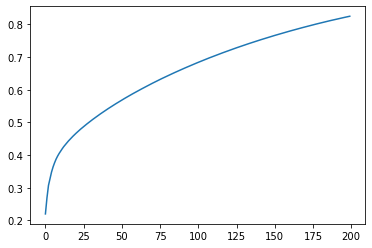

In [12]:
variance_explained = svd.explained_variance_ratio_.cumsum()
plt.plot(variance_explained)
plt.show()

# Therefore 200 features is enough to explain 80% variance, so we proceed with 200 components. Now we will run Cosine similarity 

In [13]:
from sklearn.metrics.pairwise import cosine_similarity
array_ToyStory = np.array(latent_matrix_df.loc['Toy Story (1995)']).reshape(1,-1)

##calculate similarity of this movie with others in list
score = cosine_similarity(latent_matrix_df, array_ToyStory).reshape(-1)

In [14]:
##Form a dataframe for similar movies and sort them based on score and print top recommendations
dict = {'score':score}
df_similar = pd.DataFrame(dict, latent_matrix_df.index)
df_similar.sort_values('score', ascending=False, inplace=True)

In [15]:
##Recommended movies for Toy Story
df_similar.head(6)

,score
Toy Story (1995),1.000000
Star Wars (1977),0.758195
Independence Day (ID4) (1996),0.720947
Return of the Jedi (1983),0.718463
"Rock, The (1996)",0.689012
Mission: Impossible (1996),0.681605


In [16]:
## Similarly get Recommendations for StarWars
array_StarWars = np.array(latent_matrix_df.loc['Star Wars (1977)']).reshape(1,-1)

##calculate similarity of this movie with others in list
score_1 = cosine_similarity(latent_matrix_df, array_StarWars).reshape(-1)

In [17]:
##Form a dataframe for similar movies and sort them based on score and print top recommendations
dict = {'score':score_1}
df_similar_1 = pd.DataFrame(dict, latent_matrix_df.index)
df_similar_1.sort_values('score', ascending=False, inplace=True)

##Recommended movies for Star Wars
df_similar_1.head(6)

,score
Star Wars (1977),1.000000
Return of the Jedi (1983),0.925249
Raiders of the Lost Ark (1981),0.796726
"Empire Strikes Back, The (1980)",0.778303
Toy Story (1995),0.758195
Independence Day (ID4) (1996),0.719633
